# Wiresharks Simple Packets Analyzer Project

### 1. import pandas library

In [66]:
import pandas as pd

### 2. Read CSV files that generated from wiresharks

In [67]:
df = pd.read_csv('/content/drive/MyDrive/Shared/packets analyzer/packets.csv')

### 3. Show first 5 rows

In [68]:
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,192.168.66.42,lhr48s29-in-f10.1e100.net,TCP,55,50272 > https(443) [ACK] Seq=1 Ack=1 Win=513...
1,2,0.159178,lhr48s29-in-f10.1e100.net,192.168.66.42,TCP,66,https(443) > 50272 [ACK] Seq=1 Ack=2 Win=327...
2,3,0.178257,d6:ae:3e:47:24:fa,MS-NLB-PhysServer-32_0e:6c:72:17:05,ARP,42,Who has 192.168.66.42? Tell 192.168.66.117
3,4,0.178273,MS-NLB-PhysServer-32_0e:6c:72:17:05,d6:ae:3e:47:24:fa,ARP,42,192.168.66.42 is at 02:2e:6c:72:17:05
4,5,1.138147,192.168.66.42,par10s22-in-f227.1e100.net,TCP,55,50481 > https(443) [ACK] Seq=1 Ack=1 Win=511...


### 4. Print the rows and columns length

In [69]:
df.shape

(598, 7)

### 5. Protocols as a use case for analyzing

In [70]:
by_protocol = df.groupby('Protocol').Source.count()
by_protocol

Protocol
ARP          4
DNS         51
MDNS        48
QUIC         5
SSDP        22
TCP        219
TLSv1        6
TLSv1.2     55
TLSv1.3    140
UDP         48
Name: Source, dtype: int64

### 6. Sort the protocols by number of occurence

In [71]:
by_protocol.sort_values()

Protocol
ARP          4
QUIC         5
TLSv1        6
SSDP        22
MDNS        48
UDP         48
DNS         51
TLSv1.2     55
TLSv1.3    140
TCP        219
Name: Source, dtype: int64

### 7. Plotting the scatter number of protocols with number of occur

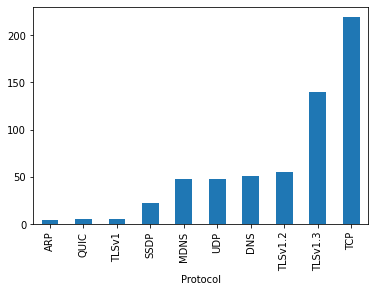

In [72]:
by_protocol.sort_values().plot(kind='bar')

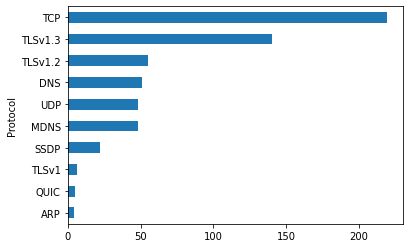

In [73]:
by_protocol.sort_values().plot(kind='barh')

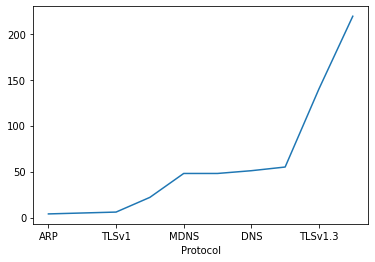

In [74]:
by_protocol.sort_values().plot(kind='line')

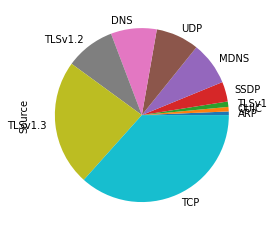

In [75]:
by_protocol.sort_values().plot(kind='pie')

### 8. Specific protocols and its length

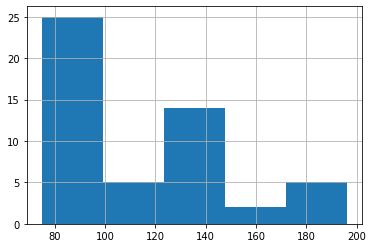

In [76]:
df[df['Protocol'] == 'DNS'].Length.hist(bins=5)

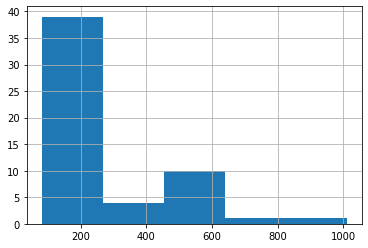

In [77]:
df[df['Protocol'] == 'TLSv1.2'].Length.hist(bins=5)

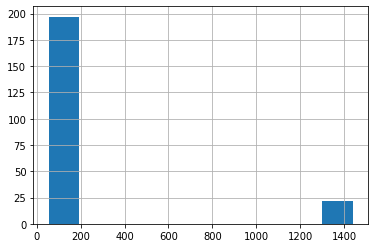

In [78]:
df[df['Protocol'] == 'TCP'].Length.hist(bins=10)

### 9. Sort and plot for the source

In [79]:
# Group by Source Address and Payload Sum
source_addresses = df.groupby("Source").sum()
source_addresses

,No.,Time,Length
Source,,,
131.160.120.34.bc.googleusercontent.com,191,27.223055,120
172.217.21.42,110,13.944167,54
192.168.66.117,4376,338.899786,3478
192.168.66.42,89608,6143.142386,81298
20.90.153.243,161,15.511032,66
MS-NLB-PhysServer-32_0e:6c:72:17:05,479,27.749452,84
clients.l.google.com,16023,954.998473,20192
d6:ae:3e:47:24:fa,477,27.749418,84
drive.google.com,39896,2612.931840,39001


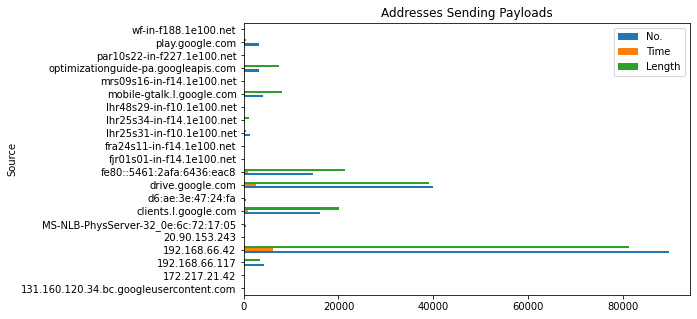

In [80]:
source_addresses.plot(kind='barh',title="Addresses Sending Payloads",figsize=(8,5))

### 10. Sort and plot for the destination

In [81]:
destination_addresses = df.groupby("Destination").sum()
destination_addresses

,No.,Time,Length
Destination,,,
131.160.120.34.bc.googleusercontent.com,185,26.949150,138
172.217.21.42,213,27.836811,108
192.168.66.117,4686,361.754422,2344
192.168.66.255,697,83.998536,1940
192.168.66.42,73921,4951.647625,81365
20.90.153.243,157,15.395798,55
224.0.0.251,8610,549.471511,1968
239.255.255.250,12494,870.951760,22944
MS-NLB-PhysServer-32_0e:6c:72:17:05,477,27.749418,84


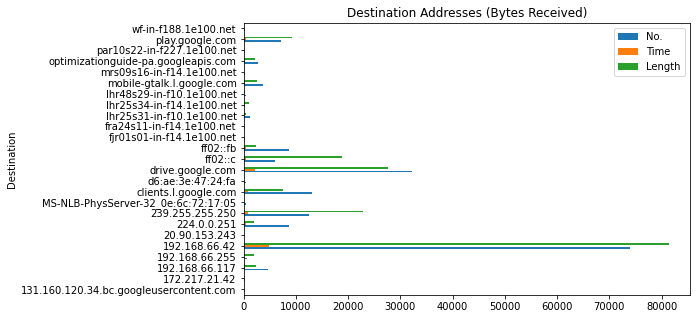

In [82]:
destination_addresses.plot(kind='barh', title="Destination Addresses (Bytes Received)",figsize=(8,5))